Please fill in your name and that of your teammate.

You: Amine CHARFEDDINE

Teammate: Delil DAG

# Introduction

Welcome to the second lab. I hope this environment is starting to look more familiar, and that you learned some of the shortcuts. At least try to use shortcuts to evaluate a cell, create a cell above or below the current, and switch between code and markdown, as these will dramatically improve your efficiency and significantly cut the time it takes to complete the assignment.  
Also, if you have not tried LaTeX in the previous assignment, give it a try in this one $y=mx+q$: a little practice goes a long way for when you will need to write more complex equations and LaTeX will be required (e.g. future assignments + exam).

Today's assignment is likely going to be a bit more time consuming than last week. And there is _a lot_ of Python.  I received multiple emails from people who are not confident in their Python skills or are worried having to learn it now in parallel with the main class content. I understand the concern and will be sure to hold your hand step by step in learning and practicing the required skills even if you have no prior experience.  
Please understand nonetheless that proficiency in Python as seen here will be mandatory to pass the exam, so give it your best effort. You may want to start completing this assignment for example a few days before the deadline, to leave yourself time to ask any question on Moodle if needed.

Last week we introduced three libraries: `numpy` does the main number crunching in Python; `matplotlib` is the foundation of most plotting; and `seaborn` wraps the plotting in a convenient interface and eye-pleasing defaults.

Today we introduce **Scikit-learn**, another heavy-weight library in the field which provides basic (but high-quality and fast) data analysis and ML tools.  
Head over to the home page of [Scikit-learn](https://scikit-learn.org/stable/): how many of the concepts are you already familiar with? Over the next week you will become confident in almost each single word used in that page. Also check out the [user manual](https://scikit-learn.org/stable/user_guide.html) for an overview of the methods at your disposal.  

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pts]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 14 points (out of 21 available) to pass** (66%).

# 1. Fundamentals

The topics of *Classification* and *Feature* are fundamental ML concepts. Today's lecture has barely scratched the surface, especially if you think Data Analysis as a goal rather than a simple step, so we will explore these topics in further detail in the upcoming weeks. Let's make sure to have a solid grasp of these concepts before moving ahead.

Again, let's start easy. Here is an example dataset of snakes. It has three fields: `head size`, `length` (in cm) and whether it is `poisonous` or not. It looks like this:

```python
snakes = [['small', 38, False],
          ['small', 62, True],
          ['medium', 55, True]]
```

This simple list of lists puts the emphasis on the data points (the rows), which is an intuitive approach at first for humans to manually write down the data. You will often encounter tables, JSON and CSV files that look like this. We will explore more machine-friendly formats later (spoilers: column-oriented), so understand this approach is just a step for ease of comprehension.

Let's lighten the mood by focusing on cats and dogs instead for your exercise.

#### 1.1 **[1pt]** Name three features that are highly discriminative to classify cats from dogs, and three which are not.

3 features that are highly discriminative :
- Ear shape : pointy (cat) vs floppy (dog)
- Eye shape : almond (cat) vs round (dog)
- Tail-to-body ratio : 0.25-0.35 (cat) vs 0.1-0.25 (dog)

3 features that are not :
- Size (small, medium, large)
- Fur color (red, black, white...)
- Coat texture (smooth, curly, double..)


#### 1.2 **[1pt]** Is "number of legs" a numeric feature? Is it discrete or continuous? Is it ordinal? What about "length of tail"?

Careful not to confuse "discrete cardinal" with "continuous". If you cannot tell the difference, refresh the concept!

Yes, "number of legs" is a numeric feature. It is a discrete variable (it can only take specific number values), but not ordinal since the values do not have a natural order. It is instead cardinal.

Yes, "length of tail" is a numeric feature. It is a continous variable (it can take any value within a certain range, and be floats) but not ordinal since the values do not have a natural order. 

#### 1.3 **[1pt]** Write a dataset named `pets` containing cats and dogs, with at least 3 features and 5 entries. Write the corresponding labels in a variable named `labels`. Save the feature names in a variable named `feature_names`.

Make sure to include some small dog and large cat, such that their size is not highly discriminant. You can write more data if you want, but do not go overboard, your goal for now is uniquely to pass the assignment. We will load some demo dataset with Scikit-learn later.

In [1]:
pets = [ 
    ["small", 0.34 ,"pointy"], 
    ["large", 0.32 , "pointy"], 
    ["large", 0.15 , "pointy" ], 
    ["small", 0.20 , "floppy"], 
    ["large", 0.26 , "pointy"]
]
labels = ["cat","cat","dog","dog","cat"] # the 4th is a small dog and the 5th is a large cat
feature_names = ["Size", "Tail-to-body ratio", "Ear shape"]

Human input means human errors: let's validate the length of these lists using `assert`, which is a Python keyword that will raise an error if its parameter is false (and just do nothing otherwise).  
Here we use `map` to execute `len` over each element of a list (which here is: for each data row), then check if all values correspond to the length of feature names. The function `all` returns whether all of its arguments have truth value. We can also verify the number of labels against the number of data points.

In [2]:
assert all(l == len(feature_names) for l in map(len, pets))
assert len(pets) == len(labels)

# 2. Decision trees

You are going to write a decision tree by hand, that classifies cats from dogs on your dataset, by using a simple chain of `if/else` statements. Do not overlook this task: it is an industry standard to integrate human expert knowledge in an automated ML system.  

Include at least two questions, meaning the tree depth (max number of decision nodes between start and leaf) should be at least 2. The leaves should contain decision labels, i.e. either $cat$ or $dog$, though you can have multiple instances of either.  
I hope you find it obvious that the labels should not be passed to the function.

Do you know the [splat operator](https://codeyarns.github.io/tech/2012-04-25-unpack-operator-in-python.html)? You may find it useful to pass data points to your function. Here is a short demonstration [video](https://www.youtube.com/watch?v=9LrtOJTnwJE).

With `map`, `zip` and the splat you should now be able to understand the `transpose()` function from last week:

```python
transpose = lambda lst: list(map(list, zip(*lst)))
```

A decent Python skill level is nowadays a mandatory requirement for good Data Analysis or Machine Learning job positions.

#### 2.1 **[2pt]** Implement a Decision Tree as a function that takes the features of a data point from the `data` defined above and returns a predicted label using an if/else chain. Run it over your `data` to obtain a list of predictions.

In [24]:
def decision_tree(size, ratio, ear_shape): #We disgard size since it is not highly discriminatory.
    if ear_shape == "pointy": #Mostly cats, with a few exceptions (belgian malinois for instance)
        if ratio >= 0.25: # only cats have a ratio superior to 0.25
            return "cat"
        else:
            return "dog"
    else:  # Only dogs have floppy ears
        return "dog"

# Predictions for the given data
predictions = [decision_tree(*animal) for animal in pets]
print(predictions)


['cat', 'cat', 'dog', 'dog', 'cat']


To quickly check if it got them all right you can use `zip`, which builds lists taking one element in turn from each of its input lists.

In [4]:
for pair in zip(predictions, labels): print(pair)

('cat', 'cat')
('cat', 'cat')
('dog', 'dog')
('dog', 'dog')
('cat', 'cat')


Now we need to properly assess the performance of our classification. This is commonly done using the [**Confusion Matrix**](https://en.wikipedia.org/wiki/Confusion_matrix): two rows and two columns, indicating the count (over the dataset) of

$$
\begin{pmatrix}
% \hrule
\text{true positives} & \text{false negatives}\\
% \hrule
\text{false positives} & \text{true negatives}
% \hrule
\end{pmatrix}
$$

(edit this cell and notice above how you can use multi-line `latex` by wrapping your code in `$$` pairs)   
(also it does not matter whether you pick $cat$ or $dog$ as the "positive" class, but be careful and consistent)

The confusion matrix if the foundation to most loss functions for classification, some of which can be [extremely sophisticated](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient).

Perfect classification means no false positives (positive answers for data points that should classify negative) and no false negatives (negative answers for data points that should classify positive) for all data points in your dataset.

Hint:
```python
pos = 'cat'; neg = 'dog'
tp = 0; tn = 0; fp = 0; fn = 0
for pred, lab in zip(predictions, labels):
    # your code here
```

#### 2.2 **[2pt]** Compute and display the Confusion Matrix. If your tree did not achieve perfect classification, write a new version that does.

Print the result using string interpolation. There are three ways to interpolate strings in Python: using `format()`, using `%` and using f-strings. You can read about [why you should switch to f-strings](https://realpython.com/python-f-strings/), but for now just try using something like this:
```python
print(f"tp: {tp}, fn: {fn}\nfp: {fp}, tn: {tn}")
```

In [5]:
pos = 'cat'; neg = 'dog'
tp = 0; tn = 0; fp = 0; fn = 0
for pred, lab in zip(predictions, labels):
    if pred == lab:
        if pred == pos:  # Correctly predicted cat
            tp += 1
        else:  # Correctly predicted dog
            tn += 1
    else:
        if pred == pos:  # Incorrectly predicted cat, actually a dog
            fp += 1
        else:  # Incorrectly predicted dog, actually a cat
            fn += 1

print(f"tp: {tp}, fn: {fn}\nfp: {fp}, tn: {tn}")

tp: 3, fn: 0
fp: 0, tn: 2


[think: did you just write a decision tree? can you name the features?]

Doing these things by hand can be tedious, but provides a different type of confidence to then go and study the documentation of the library you would rather use in real applications.  
Here is the [scikit-learn](https://scikit-learn.org/stable/modules/tree.html) implementation of a decision tree, and here is [the main class](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Let's load the implementation with the following:

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_text

#### 2.3 **[1pt]** Train a scikit-learn DecisionTreeClassifier on your dataset.

In [7]:
X_encoded = []
for animal in pets:
    if animal[0] == "small":
        size = 0
    else :
        size = 1
    if animal[2] == "floppy":
        ear_shape = 0
    else:
        ear_shape = 1
    X_encoded.append([size, animal[1], ear_shape])

clf = DecisionTreeClassifier()
trained = clf.fit(X_encoded, labels)
print(export_text(trained, feature_names = feature_names))

|--- Tail-to-body ratio <= 0.23
|   |--- class: dog
|--- Tail-to-body ratio >  0.23
|   |--- class: cat



#### 2.4 **[1pt]** Compare the two trees (handmade and scikit-learn) in number of leaves, tree depth, selected features, and thresholds (in English).

In [8]:
num_leaves = clf.get_n_leaves()
print("Number of leaves :",num_leaves)
tree_depth = clf.get_depth()
print("Depth of tree :",tree_depth)

Number of leaves : 2
Depth of tree : 1


The scikit-learn tree has : <br>
    - Less leaves (2 against 3 for the handmade one) <br>
    - A smaller depth (1 against 2 for the handmade one) <br>
    - Less selected features : "Tail-to-body ratio" only (against "Size" and "Tail-to-body" for the handmade one) <br>
    - A more precise treshold (0.23 against 0.25 for the handmade one) 


# 3. Perceptron

This is our first proper learning algorithm, and also the first with an iterative implementation. Its implementation is simple: you should use this opportunity to become confident in its features, as we will find them in much more complex algorithms over the next weeks. Any extra work in this section will make the following assignment much, much easier.

#### 3.1 **[1pt]** Write the equation of an hyperplane in $\mathbb{R}^k$, specifying the numeric set and dimensionality of each parameter.

The equation is : $ a_{1}x_{1} + a_{2}x_{2} + ... + a_{k}x_{k} = b $ <br>
where : <br>
$ a_{1}, a_{2},... , a_{k} $ are the coefficients of the hyperplane along each dimension. There are k coefficients since k is the dimension of the space $\mathbb{R}^k$ <br>
$ x_{1}, x_{2}, ... , x_{k} $ are the coordinates of a point in the k-dimensional space. Similarly, there are k coefficients since k is the dimension of the space $\mathbb{R}^k$ <br> <br>
The previous equation can be rewritten as : $ y = \langle a,x \rangle + b $ <br>
where : $ a,x \in \mathbb{R}^{k} $ and $ b,y \in \mathbb{R} $

#### 3.2 **[1pt]** Write the definition of *Linearly Separable Dataset* in plain English (no math).

A linearly separable dataset is a dataset where it's possible to draw a straight line (or a hyperplan if the dimension is superior to 2) that separates the data points into two distinct groups. Each group contains data points with similar characteristics. 

For the next question, let's make sure the concept of Margin and its use is clear. Here is an example of point $(x, y)$ and hyperplane parametrization (w, b).

$$
\text{point: }\;\; ((1, 3, -5, -2), +1)\\
\text{params: }\;\; ((2, 7, -3, 5), -2)\\
$$

#### 3.3 **[1pt]**  Compute by hand (LaTeX not Python!) the *margin* for the point and hyperplane above: is the point correctly classified by the hyperplane? Why?

The margin is equal to : <br> 
$ \quad y \cdot f(x) = y \cdot (\langle w,x \rangle) + b ) = 1 \cdot [(1*2 + 3*7 + (-5)*(-3) + (-2)*5) + (-2) ] = [ (2+21+15-10) + (-2) ] = 26 > 0$ <br>
Since the margin is positive, the point is correctly classified. It lies on the correct side of the hyperplane.

For the next question we use `numpy`.  
We use the definition of Affine Function for the parametrization: here `point` has been conveniently augmented with a trailing $1$ representing the constant input for bias.  
Careful from now on you will need to take care of that yourself, starting from one of the next questions. Here are two examples (marked `1` and `2`) of how it can be done.

```python
x = [1, 3, -5, -2]
y = 1
w = [2, 7, -3, 5]
b = -2
point = [np.array([*x, 1]), y] # 1
params = np.append(np.array(w), b) # 2
```

Use `np.dot()` to compute the inner product.

#### 3.4 **[1pt]**  Write a function that takes in input an hyperplane parametrization and a point, computes the margin, and returns a boolean indicating whether the classification is correct or not. Run it on the point and parametrization provided below ("The Inputs"), and print whether the classification is correct or not.

In [9]:
# The Inputs -- do not change
import numpy as np
point = [np.array([1, 3, -5, -2, 1]), 1]
params = np.array([2, 7, -3, 5, -2])

In [23]:
def classified_correctly(params,point):
    x,y = point # we know that the parameter "point" has the absciss x followed by its ordinate y 
    margin = y*(np.dot(params,x))
    if margin > 0:
        return(True)
    else:
        return(False)
        
print(classified_correctly(params,point))

True


#### 3.5 **[1pt]** Implement the Perceptron update rule for a single point as a method that takes a hyperplane parametrization and a point (which we assume we know is misclassified) and returns the updated parametrization. Run it on The Input above and print the updated parametrization.

In [11]:
def perceptron_update_rule(params,point):
    x,y = point
    return(params + y*x)
new_params = perceptron_update_rule(params, point)
print(new_params)

[ 3 10 -8  3 -1]


#### 3.6 **[1pt]** Print whether the updated parametrization from the last question correctly classifies the point from The Input (use the margin-based function you wrote to answer two questions above).

In [12]:
new_params = perceptron_update_rule(params,point)
print(classified_correctly(new_params,point))

True


Alright, do you feel confident of your implementation so far? Let's scale it up: implement the Perceptron Algorithm and run it on a demo dataset from Scikit-learn.

First we load the classic [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py), its history is very interesting so make sure to [have a look at it](https://en.wikipedia.org/wiki/Iris_flower_data_set).
Since we are studying linear binary classification, let's collapse two classes together and focus on two if its four features.

In [13]:
from sklearn.datasets import load_iris
iris_x, iris_y = load_iris(return_X_y=True) # print these to understand
x1 = np.array([r[0] for r in iris_x]) # first feature
x2 = np.array([r[2] for r in iris_x]) # third feature
x = np.array([x1, x2]).transpose() # numpy transpose() for free
# Reduce to two binary classes {+1, -1}
labels = np.array([-1 if y==0 else +1 for y in iris_y])

Your Perceptron inputs should be $x$ input vector and $labels$ target labels / classes.  
We learned last week what we need to plot such a dataset, right?

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

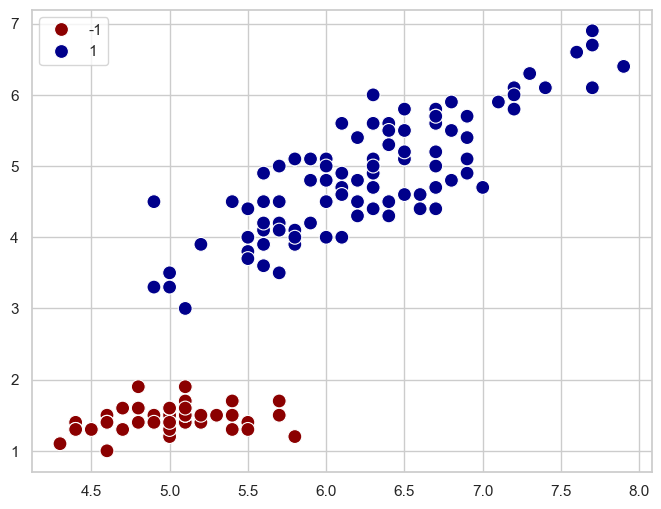

In [15]:
def todays_plot(): # learn to write your own
    sns.scatterplot(x=x1, y=x2,
      hue=labels, # let's use different colors for the two classes
      palette=sns.color_palette(['darkred', 'darkblue']),
      s=100)

todays_plot()

The problem is clearly linearly separable. Let's see how the Perceptron performs

#### 3.7 **[4pt]** Implement the Perceptron Algorithm in a single cell (do not call any function defined above) as a function that takes the input vector and target labels and returns a trained hyperplane parametrization. Run it on the (partial) Iris data loaded above.

In [16]:
def perceptron(vector,target_labels):
    w = np.zeros(len(vector[0])+1) # by default, we set w equal to zero, and we add one to the lenght for b
    solved = False
    while not solved:
        solved = True 
        for i in range(len(vector)):
            x = vector[i]
            x = np.append(x, [1]) # x is augmented with trailing 1, as shown above
            y = target_labels[i]
            u = y* np.dot(w,x)
            if u<= 0:
                w = w + y*x
                solved = False
                break
    *w, b = w #unpacking every element but the last for w (and the last is the b we left space for in the first line)
    return([w,b])

x = np.array([x1, x2]).transpose() # following the example given above about iris
labels = np.array([-1 if y==0 else +1 for y in iris_y]) 

w = perceptron(x, labels)
print("Weights:", w)

Weights: [[-3.3999999999999977, 9.100000000000001], -2.0]


Ok we can plot the points and we can plot a $y = mx + q$ model. But how can we plot the $f(x) = \langle w, x \rangle + b$ decision boundary? Well we know the two classes are $f(x)>0$ (positive, above) and $f(x)<0$ (negative, below), so our boundary is in $f(x) = 0$. Then we can find the function coefficients in the $w_1, w_2$ space as:

$$
f(x) = \langle w, x \rangle + b = 0\\
w = \begin{bmatrix}w_1\\w_2\end{bmatrix}\\
ax + by + c = 0\\
y = mx + q\\[2ex]
a = w_1,\;\; b=w_2,\;\; c = b\\
w_1 x + w_2 y + b = 0\\
-w_2 y = w_1 x + b\\
y = \frac{w_1}{-w_2} x + \frac{b}{-w_2}\\[2ex]
m = \frac{w_1}{-w_2},\;\; q = \frac{b}{-w_2}\\
y = \frac{w_1}{-w_2} x + \frac{b}{-w_2}
$$

For now you can use the implementation below, but make sure you understand these simple (if tedious) steps above because next time you will need to implement it yourself.

In [17]:
def wb2mq(w, b):
    assert len(w) == 2, "This implementation only works in 2D"
    assert w[0] != 0 and w[1] != 0 and b != 0 # avoid edge cases for now
    return [w[0]/-w[1], b/-w[1]] # m and q

def params2boundary(w, b):
    m, q = wb2mq(w, b)
    print(f"m: {m}, q: {q}")
    return lambda x: m*x + q

I hope the code above comes to no surprise after having derived it mathematically. If you read it aloud it should sound obvious in English; if not go back and make sure you understand the mathematical derivation (and the code above) before moving forward or it is only going to be more confusing.  
Now we can plot the model on top of our data:

w: [-3.3999999999999977, 9.100000000000001], b: -2.0
m: 0.3736263736263733, q: 0.21978021978021975


<Axes: >

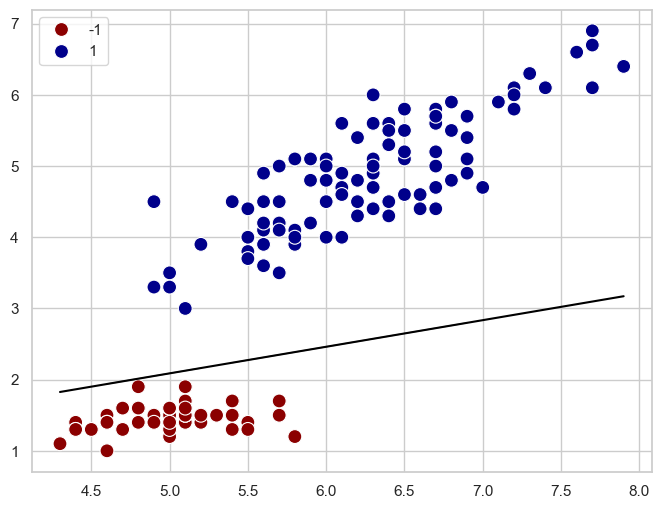

In [18]:
todays_plot()
perc_w, perc_b = perceptron(x, labels)
# we can use the splat to separate the bias (last element)
print(f"w: {perc_w}, b: {perc_b}")
perc_boundary = params2boundary(perc_w, perc_b)
sns.lineplot(x=x1, y=[perc_boundary(inp) for inp in x1], color='black')


Alright! Let's do the same with the scikit-learn Perceptron and we are done.

In [19]:
from sklearn.linear_model import Perceptron

#### 3.8 **[1pt]** Train a scikit-learn Perceptron on the same data as the last question.

Note: it should take *no more than two lines*. You should still have the documentation open, the class you are looking for is `Perceptron`, and the method you need is typically called `fit` for most sklearn algorithms. Find out how it works and how to pass features and labels as arguments.

In [20]:
model = Perceptron()
trained = model.fit(x, labels)

To visualize the model boundary we need extract the vectors $w$ and $b$ from a trained scikit-learn Perceptron: they are stored as `coef_` (coefficients stands for weights) and `intercept_` (which is another term for `q` or bias) _(as mentioned: be flexible with the nomenclature as each library adopts its own)_.  
Note though that they are both `list`s, because the algorithm is written to scale to _multiclass classification_, where you have multiple classes and therefore need multiple hyperplanes to partition the space in multiple regions. Of course with two classes you only need one hyperplane so be sure to access only the first element.  
I will be providing the code below yet again, but make sure you study and understand it so you will be able to write it yourself in the next assignments.

m: 0.423076923076923, q: 0.19230769230769226


<Axes: >

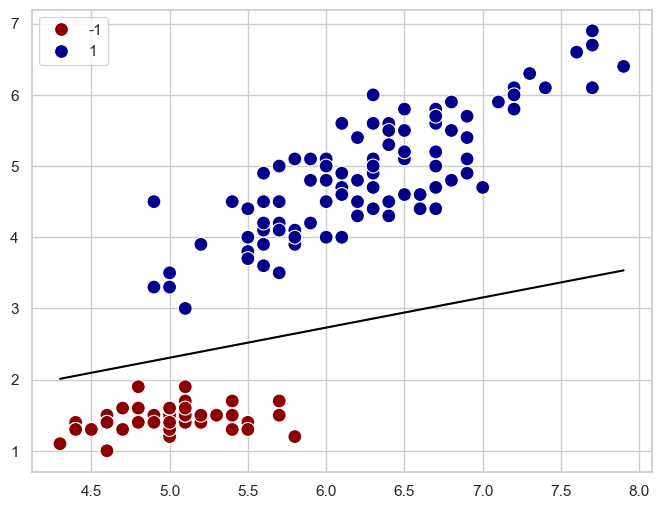

In [21]:
w, b = [trained.coef_[0], trained.intercept_[0]]
d_boundary = params2boundary(w, b)
todays_plot()
boundary_preds = [d_boundary(inp) for inp in x1]
sns.lineplot(x=x1, y=boundary_preds, color='black')

#### 3.9 **[1pt]** Compare the resulting boundary against the one trained with your hand-made algorithm, and hypothesize why _in your opinion_ they are similar/different (in English).

This exercise (as many more in the future) trains your ability to express your opinion and  fundamental understanding of the topic using technical language. It is scored based on your expressiveness, not on the correctness (although you should be able to formulate a correct opinion here) or on the English per se. Show your reasoning!

In [22]:
delta_m = abs(0.423076923076923 - 0.3736263736263733) / 0.3736263736263733
print(round(delta_m*100,1))

delta_q = abs(0.19230769230769226 - 0.21978021978021975) / 0.21978021978021975
print(round(delta_q*100,1))

13.2
12.5


First, the percentage difference of m (the slope) is equal to approximately 13.2% which indicates a small error (but which cannot be ignored) between the hand-made algorithm and the trained one. 
Second, the percentage difference of q (the intercept) is equal to approximately 12.5% which indicates a small error (but which cannot be ignored) between the hand-made algorithm and the trained one. <br> <br>
To conclude, in my opinion, we can say that the resulting boundaries are similar to each other, since the differences are not large. However, the one trained with scikit-learn is more accurate and has a smaller margin. I believe it is due to the fact that the scikit-learn model may use more parameters and is more optimized than the model found with my algorithm.
